# 01. 베이지안 추론

<br>

## 01.01.
- INLA는 빠르고 정확한 모델 적합을 가능하게 하는 베이지안 통계 분야의 최신 기술 중 하나

<br>

## 01.02. 베이지안 추론
- 베이지안 추론에서 모델의 모든 알려지지 않은 양적변수가 확률변수로 처리되며, 목표는 사후 결합 분포를 계산(또는 추정)하는 것
- 매개변수 $\theta$의 분포와, 관측값 $y$에 대하여, 베이즈 정리에 따른 사후분포는 아래와 같음

$$\pi(\theta \mid \mathbf{y}) = \frac{\pi(\mathbf{y} \mid \theta)\pi(\theta)}{\pi(\mathbf{y})}$$

<br>

- $\pi(y|\theta)$는 매개변수 $\theta$ ($\Theta$의 범위안에 존재)가 주어졌을 때의 관측값 $y$의 가능도
- $\pi(\theta)$는 매개변수와 주변 가능도 $\pi(y)$의 사후분포이며, 정규화 상수로서 아래와 같이 계산

$$\int_{\Theta} \pi(\mathbf{y} \mid \theta)\pi(\theta) d\theta$$

<br>

- 사후분포는 사전분포와 가능도의 곱과 비례

$$\pi(\theta \mid \mathbf{y}) \propto \pi(\mathbf{y} \mid \theta)\pi(\theta)$$

<br>

- 모델의 가능도는 주어진 매개변수에 대한 데이터 생성 프로세스를 설명하며, 사전분포는 일반적으로 모델 매개변수에 대한 사전 지식을 반영
* 사전 지식이 부족한 경우, 관측된 데이터에 따라 사후분포가 결정되도록 비교적 모호한 사전분포가 가정


<br>

- 모델의 매개변수에 대한 요약통계량 $\theta$, 결합분포 $\pi(\theta|y)$를 통해서 얻을 수 있으며, 

    개별 $\theta$에 대한 각각의 사후주변분포는, 나머지 매개변수를 통합하여 얻을 수 있음
    
    $$\pi(\theta_i \mid \mathbf{y}) = \int \pi(\theta \mid \mathbf{y}) d\theta_{-i},\ i=1,\ldots, \textrm{dim}(\theta)$$
    
    - $\theta_{-i}$는 매개변수 집합 $\theta$에서 $\theta_i$를 제외한 형태를 의미
    - 사후 주변분포는 개별 매개변수를 요약하고, 요약 통계량을 계산하는 데 매우 유용
    

<br>

## 01.03. 켤레 사전분포
- 켤레 분포가 있는 모델은, 정규화 상수를 계산하지 않고 사후분포를 추정할 수 있음
- 예를 들어, 관측값 $\{y_i\}_{i=1}^n$이 가우스 분포를 따르고,

    $$y_i \mid \mu,\tau \sim N(\mu, \tau),\ i=1,\ldots, n$$
    
    $\mu$가 알려지지 않은 평균이고, $\tau$가 알려지지 않은 표준편차일 때,
    
    $\mu$에 대한 사전분포는 $\mu_0$과 $\tau_0$을 각각 매개변수로 가지는 가우스 분포로 정의될 수 있음
    
<br>

- 또한 $\mu$에 대한 사후분포 ($y$의 조건에 대한 $\mu$의 조건부 분포)는 

    $$\mu_1 = \mu_0 \frac{\tau_0}{\tau_0 + \tau n} + \overline{y}\frac{\tau n}{\tau_0 + \tau n}$$
    
    $$\tau_1 = \tau_0 + n\tau$$를 각각 매개변수로 가지는 정규분포 $N(\mu_1,\tau_1)$를 따름


<br>

## 01.04. 계산 방법
- 정규화 상수를 계산할 수 없는 복잡한 형태(닫힌 형태)의 경우, 다른 방법으로 사후분포를 추정하거나, 표본을 추출
    - 사후 분포에서 표본이 주어지면 에르고딕 정리(Ergodic theorem)를 통해 적률기반 통계량과 관심 있는 양적 변수을 추정(Brooks et al. 2011).

<br>

- 일반적으로 이상적인 계산 형태는, 적분을 사용하여 추정하는 아래와 같은 경우

    - 에) 매개변수 $\theta_i$($\Theta 범위 안에 존재$)에 대한 사후 평균의 계산

    $$\int_{\Theta_i} \theta_i \pi(\theta_i \mid \mathbf{y}) d\theta_i$$
    
    - $\pi(\theta_i|y)$의 분포는, 다변량 매개변수 $\theta_i$의 사후 주변분포이며, 사후 분산 등의 다른 적률 기반의 통계량을 추정
    - 이러한 유형의 적분은, 수치 적분 방법과 라플라스 근사(Tierney and Kadane 1986)를 사용하여 근사화할 수 있음
    
<br>
    
- 또한 상수까지 알려진 밀도함수에서 표본을 추출하는 전형적인 몬테카를로 방법을 사용하여, 사후분포에서 표본을 추출 할 수 있음
    -  그러나 이러한 방법의 대부분은 고차원 공간에서는 잘 작동하지 않음

<br>

- 매개변수의 점 추정치는 가능도와 사전분포의 곱을 최대화함으로써 얻을 수 있으며,(MAP, Maximum A Posteri) 
    - 사후분포의 최대화는 일반적으로 로그 스케일에서 수행되며 뉴턴-랩슨 알고리즘 또는 EM 알고리즘과 같은 다양한 방법을 사용하여 구현(Gelman et al. 2013).


<br>

## 01.05. MCMC
- Markovchain Monte Carlo (MCMC) (Gilks et al. 1996; Brooks et al. 2011)는 사후 결합분포에서 표본을 추출하는 계산법
- 사후분포로의 수렴은 여러번의 반복을 통해 구현되며, 추론을 위해 시뮬레이션의 첫 번째 배치(burn-in 단계)에서의 체인값들은 사용되지 않음

<br>

## 01.06. INLA
* Havard Rue, Martino 및 Chopin(2009)이 개발한 베이지안 추론 계산법
- 다변량 분포인 사후 결합분포 $\pi(\theta|y)$를 추정하는 대신, 모델 매개변수의 사후 주변분포를 추정하는 데 중점 (일변량 사후분포 $\pi(\theta_i|y)$)


<br>

## 01.07. 베이지안 추론 방법론별 비교

<br>

### 왕자의 게임 예제
- 왕자의 게임 소설 책들의 한 페이지당, 알파벳 'u'의 평균 개수를 추정

In [2]:
library(tidyverse)

In [3]:
GoT <- read.csv2(file = "data/GoT.csv")
GoT %>% dim
summary(GoT)

[1] 31  1

       Us       
 Min.   :15.00  
 1st Qu.:27.50  
 Median :31.00  
 Mean   :33.03  
 3rd Qu.:36.50  
 Max.   :62.00  

<br>

### 켤레분포

- 총 31개의 관측치들이 존재하며, 관측값의 분포를 포아송분포로 설정

$$U_i \sim Po(\lambda),\ i=1,\ldots,31$$

$$P(X = x \mid\lambda) = \frac{\exp(-\lambda)\lambda^x}{x!}$$

- 포아송 분포의 매개변수 $\lambda$에 대한 사전분포로, 포아송분포의 켤레분포인 감마분포를 설정

$$f_X(x \mid a, b) = b\exp(-b\cdot x)\frac{(b\cdot x)^{a-1}}{\Gamma(a)}$$

In [4]:
xx <- seq(1, 60, by = 0.01)

got.prior <- dgamma(xx, 180, 6)
got.lik <- sapply(xx, function(lambda) {
 exp(sum(dpois(GoT$Us, lambda, log = TRUE)))
})

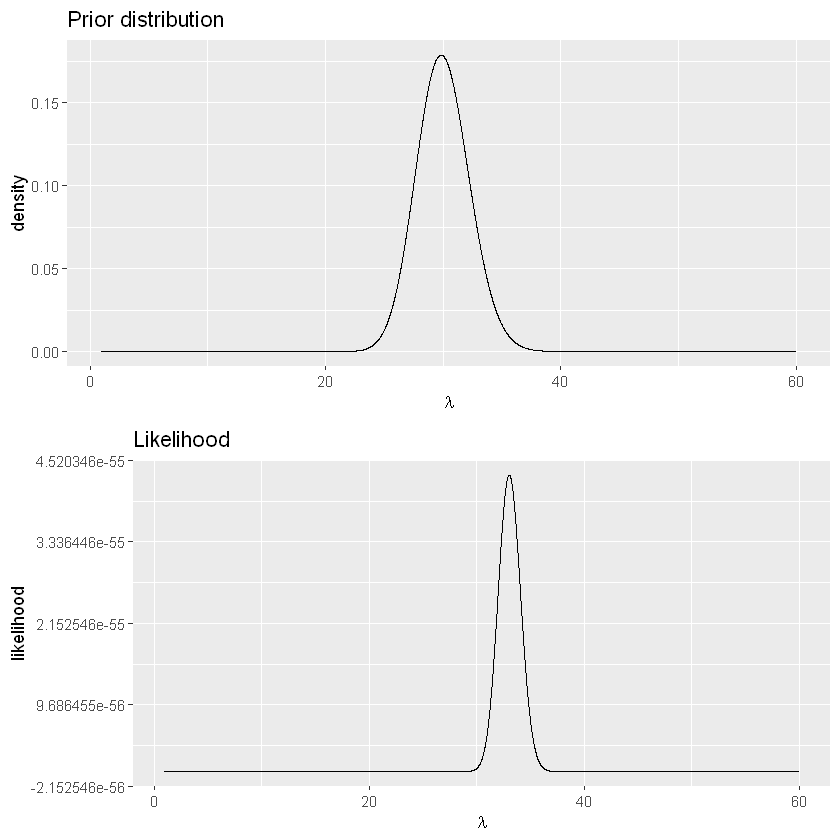

In [5]:
tab1 <- data.frame(xx, got.prior)
p1 <- ggplot(tab1, aes(x = xx, y = got.prior)) + geom_line() +
  ggtitle("Prior distribution") +
  xlab(expression(lambda)) + ylab("density")

tab2 <- data.frame(xx, got.lik)
p2 <- ggplot(tab2, aes(x = xx, y = got.lik)) + geom_line() +
  ggtitle("Likelihood") +
  xlab(expression(lambda)) + ylab("likelihood")

gridExtra::grid.arrange(p1, p2, ncol = 1)

- 감마분포와 포아송분포는 켤레분포 관계이며, 사후분포는 $a + \sum_{i=1}^{31} U_i$와 $b+n$을 매개변수로 가지는 감마분포

In [6]:
a.post <- 180 + sum(GoT$Us)
b.post <- 6 + nrow(GoT)

got.post <- dgamma(xx, a.post, b.post)

Warning message:
"Removed 4400 rows containing missing values (`geom_line()`)."


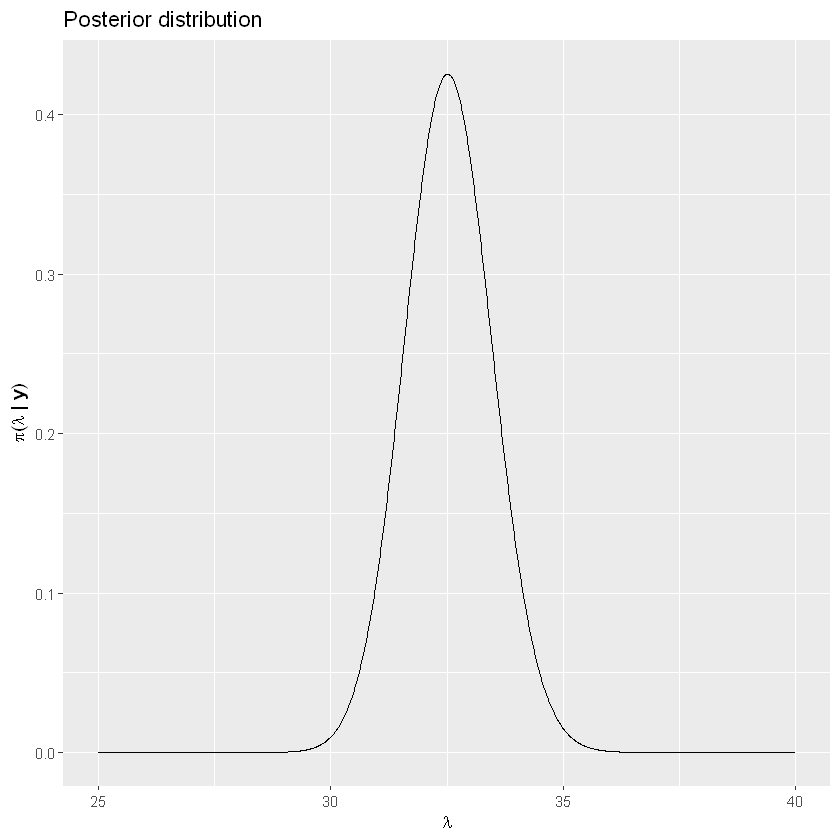

In [7]:
tab.cp <- data.frame(xx, got.post)
ggplot(tab.cp, aes(x = xx, y = got.post)) + geom_line() +
  ggtitle("Posterior distribution") +
  xlab(expression(lambda)) + 
  ylab(expression(paste(pi, "(", lambda, " | ", bold(y), ")"))) +
  xlim(25, 40)

<br>

### 최대 가능도 추정 (MLE)
- 최대 가능도 추정량은 관측값의 평균

In [8]:
mean(GoT$Us)

[1] 33.03226

<br>

### MAP (Maximum A Posteriori)
- MAP 추정치는 로그 사전분포와 로그 가능도의 합을 최대화 하여 계산

In [9]:
got.logposterior <- function(lambda) {
  dgamma(lambda, 180, 6, log = TRUE) + sum(dpois(GoT$Us, lambda,
    log = TRUE))
}

In [10]:
got.MAP <- optim(30, got.logposterior, control = list(fnscale = -1))
got.MAP$par

Warning message in optim(30, got.logposterior, control = list(fnscale = -1)):
"one-dimensional optimization by Nelder-Mead is unreliable:
use "Brent" or optimize() directly"


[1] 32.51367

Warning message:
"Removed 4400 rows containing missing values (`geom_line()`)."


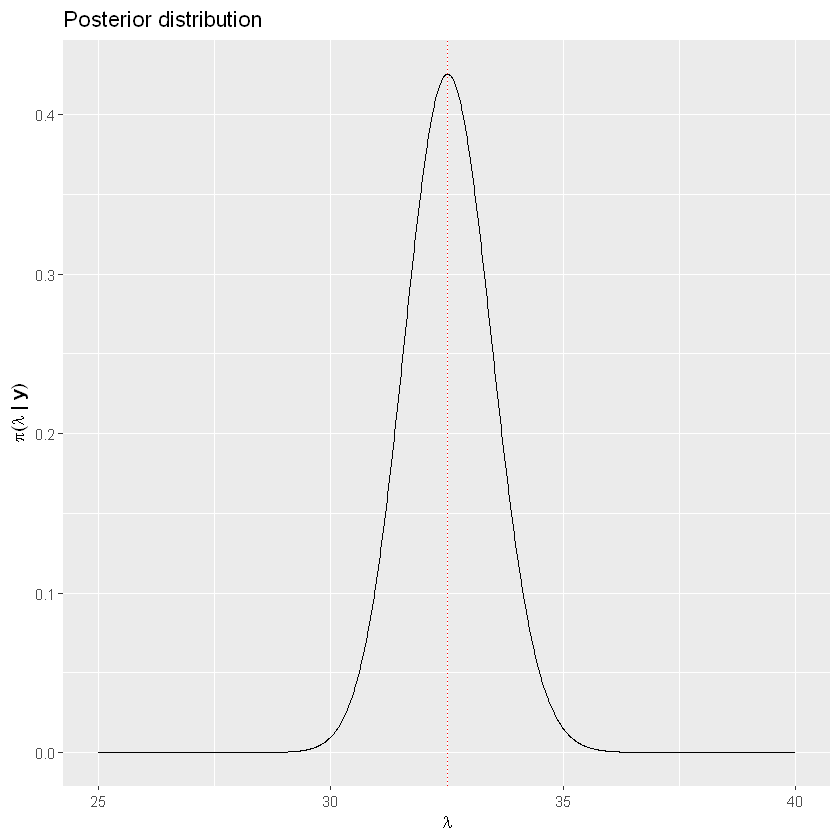

In [11]:
tab.cp <- data.frame(xx, got.post)
ggplot(tab.cp, aes(x = xx, y = got.post)) + geom_line() +
  ggtitle("Posterior distribution") +
  xlab(expression(lambda)) + 
  ylab(expression(paste(pi, "(", lambda, " | ", bold(y), ")"))) +
  geom_vline(xintercept = got.MAP$par, linetype = "dotted", colour = "red") +
  xlim(25, 40)

<br>

###  Metropolis-Hastings
- 제안분포를, 현재의 체인값 $\lambda$와 0.05를 각각 평균과 표준편차로 가지는 로그 정규분포로 설정

    초기값 20이며, 2100개의 $\lambda$ 체인값을 추출하는 Metropolis-Hastings

In [12]:
n.sim <- 2100
lambda <- rep(NA, n.sim)
lambda[1] <- 20

In [13]:
set.seed(1)
for (i in 2:n.sim) {

  lambda.new <- rlnorm(1, log(lambda[i - 1]), 0.05)

  acc.prob <- dlnorm(lambda[i -1], log(lambda.new), 0.05, log = TRUE) + 
    dgamma(lambda.new, 180, 6, log = TRUE) +
    sum(dpois(GoT$Us, lambda.new, log = TRUE)) -
    dlnorm(lambda.new, log(lambda[i - 1]), 0.05, log = TRUE) -
    dgamma(lambda[i - 1], 180, 6, log = TRUE) -
    sum(dpois(GoT$Us, lambda[i - 1], log = TRUE))

  acc.prob <- min(1, exp(acc.prob))

  if(runif(1) < acc.prob) {
    lambda[i] <- lambda.new
  } else {
    lambda[i] <- lambda[i -1]
  }

}

- **체인값의 초반 구간은, 초기값과 너무 가까운 값이 가능성이 높음 $\rightarrow$ 번인(burn-in)으로 간주되어 제거**
- **또한 체인의 값들 사이에 높은 상관관계가 존재할 가능성이 높음 $\rightarrow$ 전체 체인값에서 일부만 사용**

    **$\rightarrow$ 2100개의 체인값 중 초반 100개의 체인값을 burn-in으로 간주 & 나머지 2000개의 체인값에서 400개의 체인값만 사용**

In [14]:
lambda2 <- lambda[seq(101, n.sim, by = 5)]

- Metropolis-Hastings 를 통한 사후분포

In [15]:
summary(lambda2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  29.99   32.03   32.69   32.60   33.22   36.22 

In [16]:
tab.sim <- data.frame(iter = 1:n.sim, lambda = lambda)

tab.labels <- data.frame(
  x = c(0, 500),
  y = c(36, 36),
  text = c("burn-in", "inference")
)

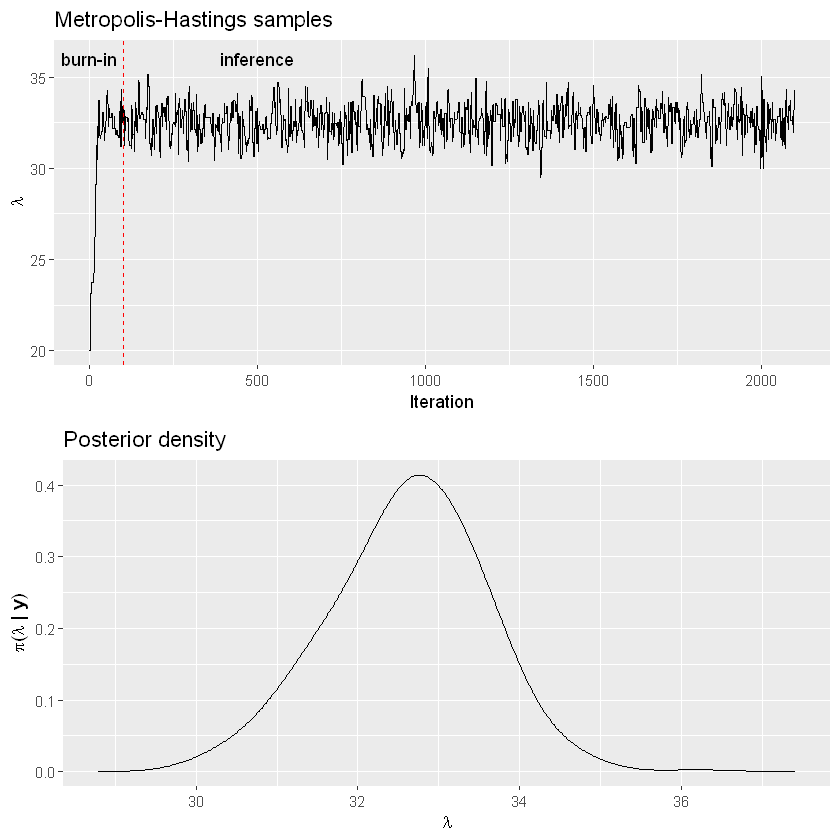

In [17]:
p1 <- ggplot(tab.sim, aes(x = iter, y = lambda)) + geom_line() +
  xlab("Iteration") + 
  ylab(expression(lambda)) + 
  geom_vline(xintercept = 100, linetype = "dashed", colour = "red") +
  geom_text(data = tab.labels, aes(x = x, y = y, label = text)) +
  ggtitle("Metropolis-Hastings samples")

dens.lambda <- as.data.frame(density(lambda2, bw = 0.4)[c("x", "y")])
p2 <- ggplot(dens.lambda, aes(x = x, y = y)) + geom_line() +
  xlab(expression(lambda)) +
  ylab(expression(paste(pi, "(", lambda, " | ", bold(y), ")"))) +
  ggtitle("Posterior density")

gridExtra::grid.arrange(p1, p2, ncol = 1)

<br>

### INLA

$$U_i \sim Po(\lambda),\ i=1,\ldots, 31$$

$$\log(\lambda) = \alpha$$

$$\pi(\alpha) \propto 1$$

- $\alpha$는 선형 예측에서의 절편이며, 상수 사전분포로 할당
    - 하나로 통합 되지 않기에 부적절한 사전분포의 형태이지만, 사전정보가 부족한 경우 (모호한 사전분포)에 유용
    
- 로그변환된 $\lambda$는 $\alpha$를 절편으로 가지는 회귀식으로 모델링

In [19]:
library(INLA)

- $\alpha$의 사후분포

In [20]:
GoT.inla <- inla(Us ~ 1, data = GoT, family = "poisson",
  control.predictor = list(compute = TRUE)
) 

Warning message in .recacheSubclasses(def@className, def, env):
"undefined subclass "ndiMatrix" of class "replValueSp"; definition not updated"


In [21]:
GoT.inla$summary.fixed

,mean,sd,0.025quant,0.5quant,0.975quant,mode,kld
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3.496996,0.03125285,3.435742,3.496996,3.558251,3.496996,0


- $\lambda$의 사후분포는, $\alpha$의 사후분포를 통하여 계산
$$\lambda = exp(\alpha)$$

In [22]:
marg.lambda <- inla.tmarginal(exp, GoT.inla$marginals.fixed[[1]])
inla.est <- inla.zmarginal(marg.lambda)

Mean            33.032 
Stdev           1.02615 
Quantile  0.025 31.0609 
Quantile  0.25  32.3267 
Quantile  0.5   33.0145 
Quantile  0.75  33.7169 
Quantile  0.975 35.0908 
